## Advanced Regression


- Define a multiple regression task, i.e., using more than one input feature, and solve it using 2 advanced regression approaches (not linear).
- Compare and evaluate the approaches using appropriate metrics.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy


from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
from scikitplot.metrics import plot_roc

from collections import defaultdict
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error


load, prep e split



In [60]:
#caricare df

df = pd.read_csv(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\df_SenzaOutlier.csv')
df.shape

(87950, 24)

In [61]:
df.head()

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,mode_confidence,n_beats,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,emotion
0,0.797420,0.947858,-0.186041,-0.472092,-0.588997,1.938632,0.659428,1.766613,-0.889812,-0.888017,...,0.079080,1.152045,0.157456,-0.277164,0,0,1,3,minimal-techno,nervous
1,2.550119,0.623286,1.063136,-1.167680,-1.142236,-1.067093,-0.469639,1.816690,-0.530867,-1.246693,...,0.430642,2.193447,-0.067569,-0.275450,0,5,0,4,minimal-techno,bored
2,0.543118,0.345082,1.355375,0.007353,-0.764607,1.004903,-0.879669,1.718254,-1.272670,-0.578946,...,1.369974,0.435994,-0.236338,-0.292966,0,7,0,3,minimal-techno,nervous
3,1.592682,-1.463244,0.633373,-0.369915,-1.010613,0.366106,-0.822027,1.836646,-0.443037,-1.657261,...,-0.041770,1.533392,-0.573877,-0.286607,0,6,0,4,minimal-techno,nervous
4,0.385608,-1.463244,1.126168,0.133109,-1.234849,-0.443351,0.558406,1.867806,-0.401379,-1.345901,...,-0.283469,0.335164,-0.180082,-0.273545,0,11,0,4,minimal-techno,nervous


In [62]:
print(len(df.columns))
df.columns

24


Index(['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'n_beats', 'popularity_artist',
       'followers_artist', 'explicit', 'key', 'mode', 'time_signature',
       'genre', 'emotion'],
      dtype='object')

In [63]:
df = df.drop(['emotion', 'popularity'], axis = 1)  # popularity_artist popularity
df.shape

(87950, 22)

In [64]:
#One-hot o label

label_encoder = LabelEncoder()
df['genre'] = label_encoder.fit_transform(df['genre'])

# # Utilizzare l'encoding one-hot per la variabile 'genre'
# df = pd.get_dummies(df, columns=['genre'], prefix=['genre'], dtype=int)

df

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_confidence,mode_confidence,n_beats,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre
0,0.797420,-0.186041,-0.472092,-0.588997,1.938632,0.659428,1.766613,-0.889812,-0.888017,2.141972,...,0.039578,0.079080,1.152045,0.157456,-0.277164,0,0,1,3,73
1,2.550119,1.063136,-1.167680,-1.142236,-1.067093,-0.469639,1.816690,-0.530867,-1.246693,-0.080843,...,-0.323653,0.430642,2.193447,-0.067569,-0.275450,0,5,0,4,73
2,0.543118,1.355375,0.007353,-0.764607,1.004903,-0.879669,1.718254,-1.272670,-0.578946,-0.147003,...,1.670084,1.369974,0.435994,-0.236338,-0.292966,0,7,0,3,73
3,1.592682,0.633373,-0.369915,-1.010613,0.366106,-0.822027,1.836646,-0.443037,-1.657261,0.221461,...,0.088009,-0.041770,1.533392,-0.573877,-0.286607,0,6,0,4,73
4,0.385608,1.126168,0.133109,-1.234849,-0.443351,0.558406,1.867806,-0.401379,-1.345901,-0.081281,...,-0.065355,-0.283469,0.335164,-0.180082,-0.273545,0,11,0,4,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87945,-0.061779,-0.564232,1.355300,1.637100,0.608776,-0.940847,1.534564,1.111459,-0.388162,1.736284,...,-1.623214,-1.805076,0.718447,1.320089,1.250663,1,5,0,4,30
87946,-0.110350,0.581802,0.325672,0.936856,-1.645092,0.136492,-0.616040,-1.018318,-0.609472,-0.756126,...,-0.384192,0.134011,-0.458242,-0.067569,-0.300284,1,9,1,4,30
87947,-0.235874,1.424137,-0.039806,0.749566,-0.122951,-0.736753,-0.605343,-0.200804,1.256403,0.255855,...,-1.586891,-0.992088,-0.027072,1.929533,1.725765,1,11,0,4,30
87948,-0.073532,0.507310,0.557535,1.449257,-0.592442,0.139463,-0.616016,-2.392504,-0.323295,-0.483129,...,0.221194,0.513040,-0.340721,-0.320723,-0.301306,0,0,1,4,30


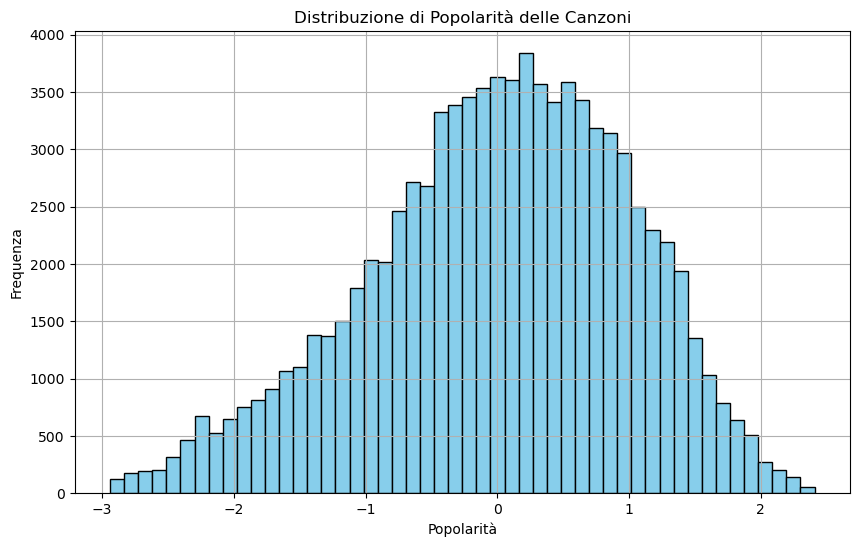

In [65]:
# Traccia la distribuzione
plt.figure(figsize=(10, 6))
plt.hist(df['danceability'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribuzione di Popolarità delle Canzoni')
plt.xlabel('Popolarità')
plt.ylabel('Frequenza')
plt.grid(True)
plt.show()

In [66]:
df.shape

(87950, 22)

In [67]:
#campionamento

# print(df.shape)
# df = df.sample(frac=0.2, random_state=42)
# print(df.shape)

SPLIT

In [68]:
target_name = 'danceability'

In [69]:
#partitioning X e Y solo su TRAIN DATA

attributes = [col for col in df.columns if col != target_name]

X = df[attributes].values
y = np.array(df[target_name])  # oppure y = df['emotion].values

X.shape, y.shape

((87950, 21), (87950,))

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70360, 21), (17590, 21), (70360,), (17590,))

prova

In [71]:
#questa sarebbe la baseline, cioè facendo semplicemente la media
y_baseline = np.full_like(y_test, np.mean(y_train)) # Calcolo della media della variabile target
mse_baseline = mean_squared_error(y_test, y_baseline)
print("MSE del modello baseline:", mse_baseline)
print('R² del modello baseline:', r2_score(y_test, y_baseline))
print("MAE del modello baseline:", mean_absolute_error(y_test, y_baseline))

MSE del modello baseline: 1.0031328643436621
R² del modello baseline: -6.75456944898567e-05
MAE del modello baseline: 0.8091046804594932


<h2>SUPPORT VECTOR REGRESSOR</h2>

In [18]:
from sklearn.svm import SVR

In [19]:
# RUN in 45 minuti con label


#POPULARITY ARTIST

param_grid = {
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'C': [0.01, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1, 10]
}

# cross-validation
grid_search = RandomizedSearchCV(SVR(), param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error', n_iter=10, random_state=42, n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Migliori parametri: ", grid_search.best_params_, grid_search.best_score_) 


# Migliori parametri:  {'kernel': 'rbf', 'epsilon': 0.1, 'C': 100} -0.42751986823841837

Migliori parametri:  {'kernel': 'rbf', 'epsilon': 0.1, 'C': 100} -0.3783370914699244


In [20]:
# Fai previsioni sul set di test con il miglior modello
best_SVR_model = grid_search.best_estimator_

y_train_pred = best_SVR_model.predict(X_train)
y_test_pred = best_SVR_model.predict(X_test)

# valutazione delle performance sul training set
print('Performance sul training set:')
print('R²:', r2_score(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('MAE', mean_absolute_error(y_train, y_train_pred))
print()

# valutazione delle performance sul test set
print('Performance sul test set:')
print('R²:', r2_score(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_test, y_test_pred))

Performance sul training set:
R²: 0.6232295676529603
MSE: 0.3723521384414204
MAE 0.4812671522254357

Performance sul test set:
R²: 0.6276007021703838
MSE: 0.3735407432424689
MAE 0.4829694446511059


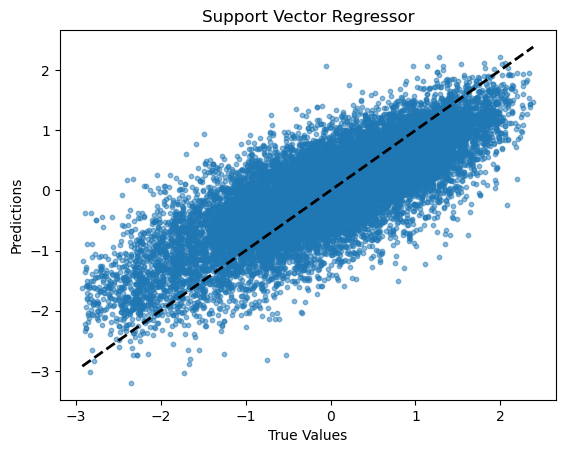

In [29]:
plt.scatter(y_test, y_test_pred, alpha=0.5, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Support Vector Regressor")
plt.show()

<H2>GRADIENT BOOSTING REGRESSOR</H2>

In [48]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [49]:
# run in 15 minuti per 10% dataset
param_grid = {
    'n_estimators': [50, 100, 500],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'min_samples_split': [2,5]
} #loss squared error

# cross-validation
grid_search = RandomizedSearchCV(estimator= GradientBoostingRegressor(), param_distributions= param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error',random_state=42, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Migliori parametri: ", grid_search.best_params_, grid_search.best_score_) 

#Migliori parametri:  {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.2} -0.07409827119940049

Migliori parametri:  {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 5, 'learning_rate': 0.2} -0.28191467504719847


In [50]:
#alleno il gradient boost regressor con i migliori parametri usciti dalla grid search

best_GBR_model = grid_search.best_estimator_

y_train_pred = best_GBR_model.predict(X_train)
y_test_pred = best_GBR_model.predict(X_test)

# valutazione delle performance sul training set
print('Performance sul training set:')
print('R²:', r2_score(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print()

# valutazione delle performance sul test set
print('Performance sul test set:')
print('R²:', r2_score(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_test, y_test_pred))

Performance sul training set:
R²: 0.7523050332667387
MSE: 0.2447903089681793

Performance sul test set:
R²: 0.727063740314192
MSE: 0.27377283978527456
MAE 0.4110777374302669


Performance sul training set:
R²: 0.9551038730679805
MSE: 0.044369641127987657

Performance sul test set:
R²: 0.7728352922348588
MSE: 0.22786099294922113
MAE 0.3620952080617545

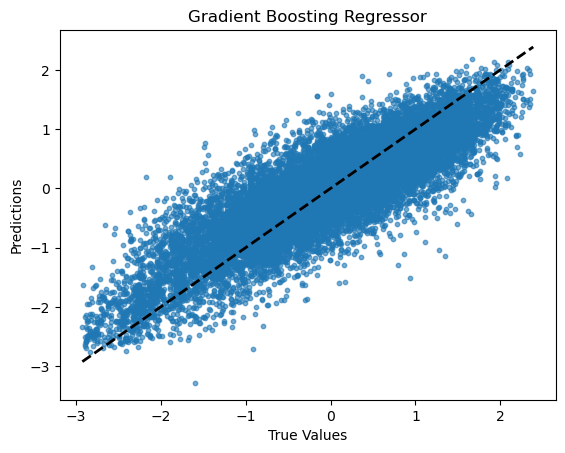

In [51]:
plt.scatter(y_test, y_test_pred, alpha=0.6, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Gradient Boosting Regressor")
plt.show()

In [52]:
importances = best_GBR_model.feature_importances_

# Creare una lista di tuple (feature, importanza)
feature_importance = list(zip(attributes, importances))

# Ordinare le feature per importanza in ordine decrescente
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Stampare le feature e le relative importanze
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")

valence: 0.2789737504084459
tempo_confidence: 0.20545355168094867
time_signature_confidence: 0.08554206426945556
tempo: 0.07760228476829342
speechiness: 0.07082969839107392
acousticness: 0.06968592880367959
energy: 0.05981858835555939
genre: 0.0466619899348596
loudness: 0.02021253221106742
liveness: 0.017654167846198932
instrumentalness: 0.013844232723867237
duration_ms: 0.01220719092309653
n_beats: 0.009441256797816175
followers_artist: 0.007457915114883164
explicit: 0.0073671889058818385
time_signature: 0.006674988270168847
popularity_artist: 0.0060495476518710985
mode_confidence: 0.0023219297460212143
key_confidence: 0.0009201772286724257
key: 0.0008973756738747314
mode: 0.00038364029426422587


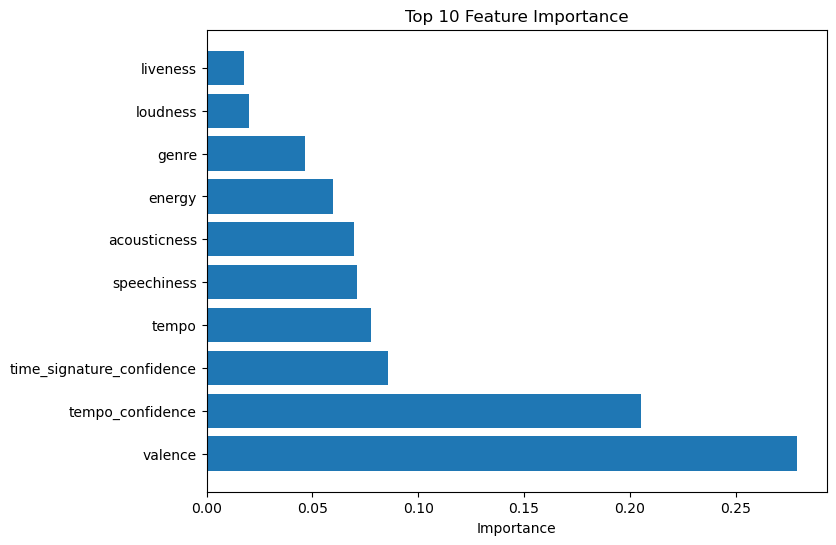

In [53]:

# Estrai le prime 10 feature e le importanze
features, importances = zip(*feature_importance[:10])

# Crea un grafico a barre delle importanze delle feature
plt.figure(figsize=(8, 6))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.show()

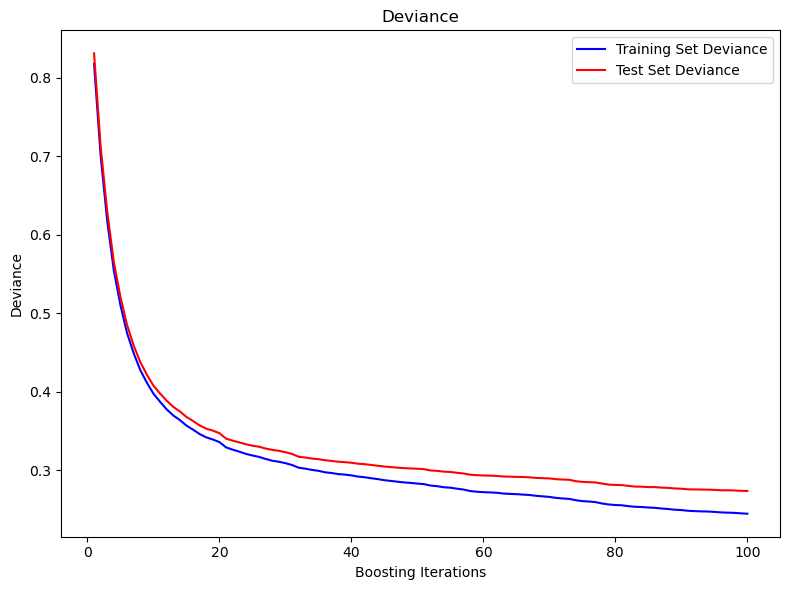

In [54]:
params = grid_search.best_params_

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(best_GBR_model.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(8, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    best_GBR_model.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

## random forest regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
#RUN in per 10% del dataset

from sklearn.model_selection import RandomizedSearchCV

# Definisci il modello Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Definisci l'insieme dei parametri da ottimizzare
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # numero di alberi nella foresta
    'max_depth': [ 10, 20],  # profondità massima degli alberi
    'min_samples_split': [2, 5, 10],  # numero minimo di campioni richiesti per suddividere un nodo
    'min_samples_leaf': [1, 2, 4],  # numero minimo di campioni richiesti in una foglia
}

# Esegui la ricerca casuale
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_grid,
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error',
                                   random_state=42, n_jobs=-1)

# Addestra il modello con la ricerca casuale
random_search.fit(X_train, y_train)

# Visualizza i migliori parametri trovati
print("Best parameters found:")
print(random_search.best_params_)



Best parameters found:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}


In [57]:
# Fai previsioni sul set di test con il miglior modello
best_rf_model = random_search.best_estimator_

y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)


# valutazione delle performance sul training set
print('Performance sul training set:')
print('R²:', r2_score(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print()

# valutazione delle performance sul test set
print('Performance sul test set:')
print('R²:', r2_score(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_test, y_test_pred))

Performance sul training set:
R²: 0.9351009758861479
MSE: 0.06413796926956225

Performance sul test set:
R²: 0.7149166731275334
MSE: 0.28595713908864395
MAE 0.4074976735027122


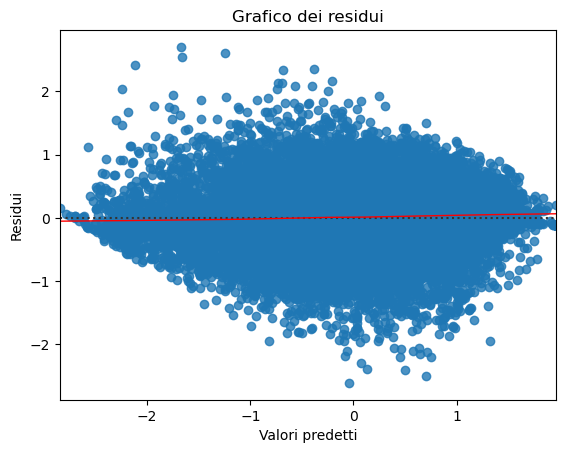

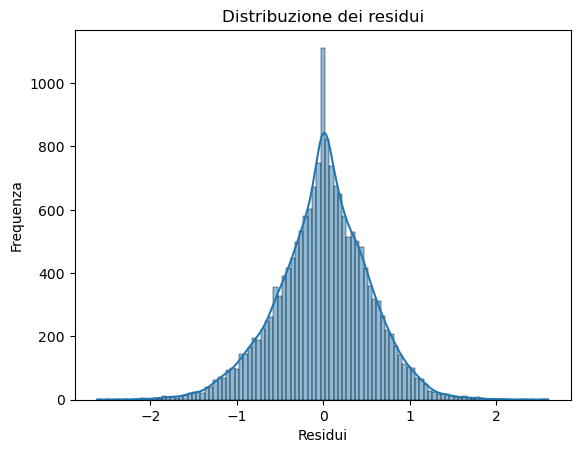

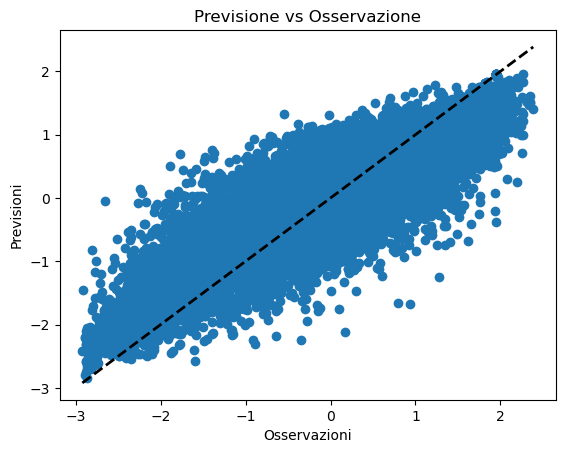

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafico dei residui
residuals = y_test - y_test_pred

sns.residplot(x= y_test_pred, y= residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Valori predetti')
plt.ylabel('Residui')
plt.title('Grafico dei residui')
plt.show()

# Grafico della distribuzione dei residui
sns.histplot(residuals, kde=True)
plt.xlabel('Residui')
plt.ylabel('Frequenza')
plt.title('Distribuzione dei residui')
plt.show()

# Grafico di previsione vs osservazione
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Osservazioni')
plt.ylabel('Previsioni')
plt.title('Previsione vs Osservazione')
plt.show()


RISULTATI